# Introduction to Scikit-Learn

Points to mention:

* Single feature linear regression
* Single feature logistic regression
* Make blobs linearly separable
* Make moons/circles - non-linearly separable
    * Find a way to visualise these decision boundaries
* Make an overlapping dataset and overfit massively
* Show how a CV procedure can ameliorate this
* Put this into a pipeline with feature normalisation
    * This can be done by transforming the moons first
* If time - show a multi class classification
* Give an example of a Random Forest:
    * Show how the SHAP library works https://github.com/slundberg/shap
    

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
np.random.seed(22)
noise = np.random.randn(200) * 2

intercept = -1.7
slope = 3.4

x = np.linspace(-2, 10, 200)
y = intercept + slope * x + noise

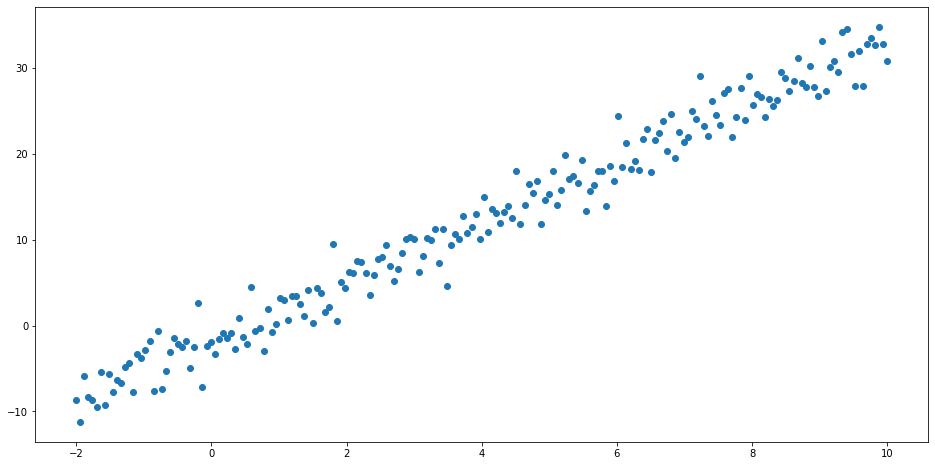

In [4]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x, y);

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# LinearRegression?

In [7]:
linear_model = LinearRegression(fit_intercept=True)

## Note that the inputs to the model _must_ be a 2D array

Although this might seem strange for a single feature input - it in nevertheless necessary.

There are 2 main ways to do this in `numpy`:

* Using `reshape` - this reshapes the array as (`n_rows`, `n_columns`) - the -1 is telling `numpy` - 'use as many as you need'
* The `newaxis` method using a slicing operation

In [8]:
X = x.reshape(-1, 1)
X = x[:, np.newaxis]

In [9]:
linear_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
linear_model.intercept_

-1.838289283733161

In [11]:
linear_model.coef_

array([3.49015194])

In [12]:
y_pred = linear_model.predict(X)

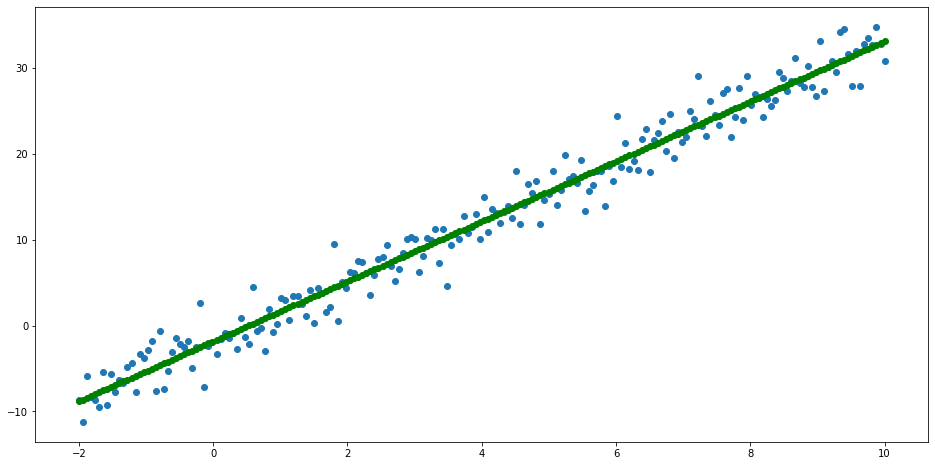

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x, y)
ax.scatter(x, y_pred, c='g');

In [14]:
x_cat = np.random.uniform(low=-2, high=8, size=50)
y_cat = np.where(x_cat > 3, 1, 0)

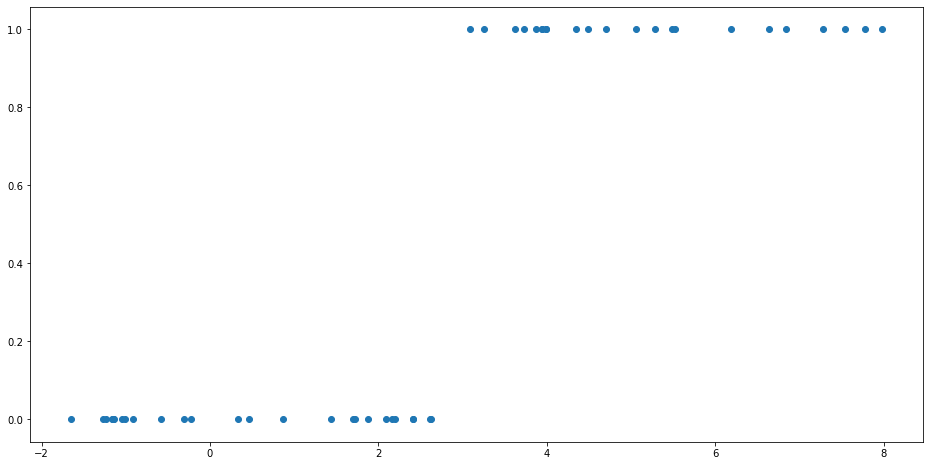

In [15]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x_cat, y_cat)

In [16]:
X_cat = x_cat.reshape(-1, 1)

In [17]:
linear_model.fit(X_cat, y_cat)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_cat_pred = linear_model.predict(X_cat)

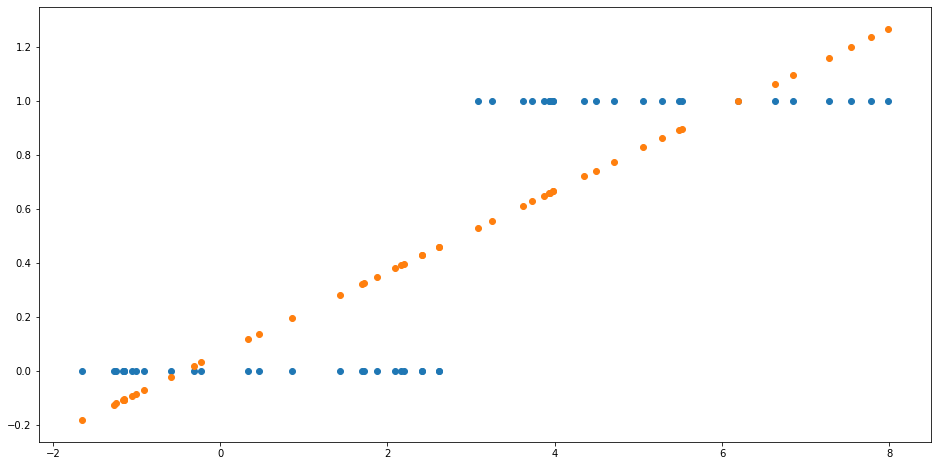

In [19]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x_cat, y_cat)
ax.scatter(x_cat, y_cat_pred);

## Logistic Regression function

$\frac{1}{1 + e^{-x}}$

In [20]:
def sigmoid(ar):
    return 1 / (1 + np.exp(-ar))

In [21]:
x_sig = np.linspace(-5, 8, 200)
y_sig = sigmoid(x_sig)

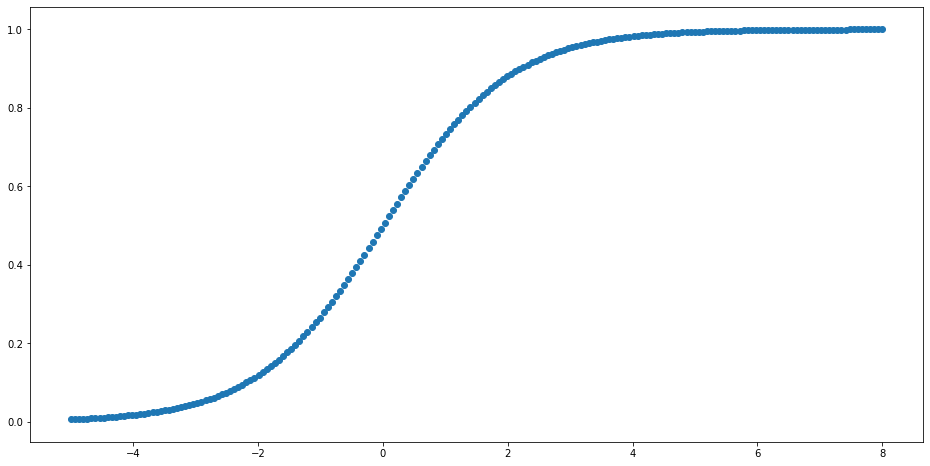

In [22]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x_sig, y_sig);

# Logistic Regression - with slope and intercept

$\frac{1}{1 + e^{slope \cdot x - intercept}}$

In [23]:
def sigmoid_extra(ar, slope, intercept):
    return 1 / (1 + np.exp(-slope * (ar - intercept)))

In [24]:
x_sig_extra = np.linspace(-5, 8, 200)
y_sig_extra = sigmoid_extra(x_sig_extra, 5, 2)

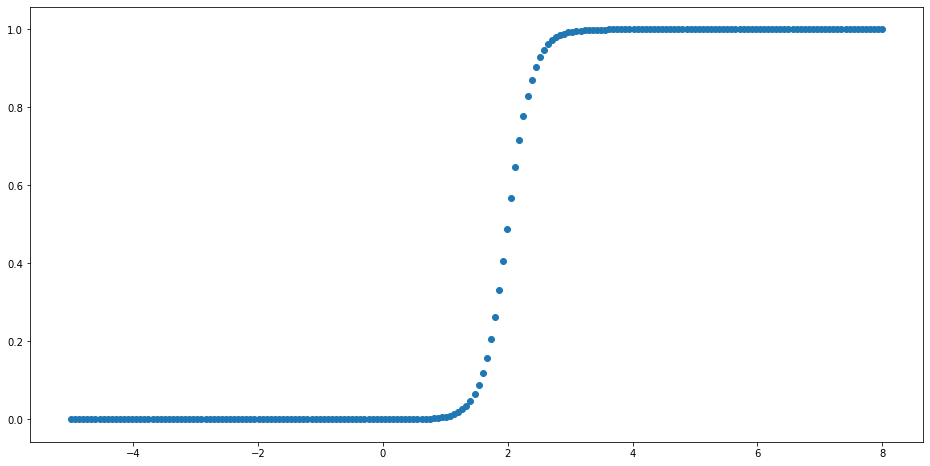

In [25]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x_sig_extra, y_sig_extra);

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_reg = LogisticRegression(solver='liblinear')

In [28]:
X_cat = x_cat.reshape(-1, 1)

In [29]:
log_reg.fit(X_cat, y_cat)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_cat_pred = log_reg.predict(X_cat)

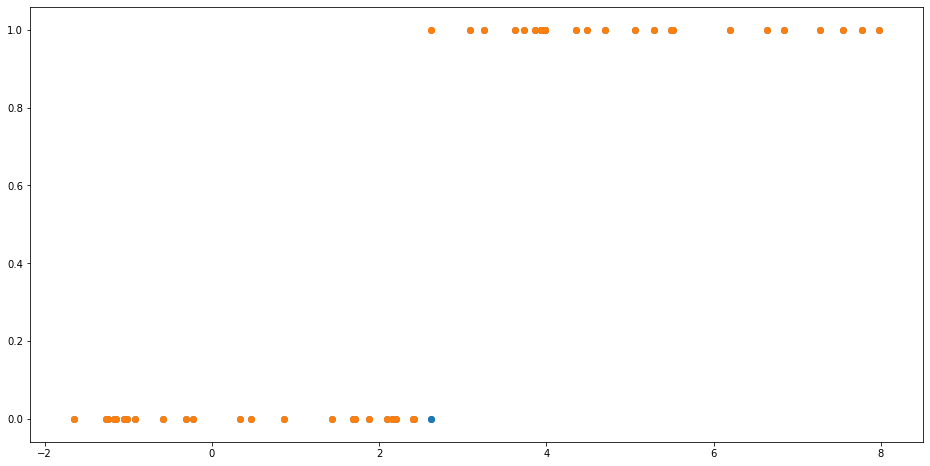

In [31]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x_cat, y_cat);
ax.scatter(x_cat, y_cat_pred);

In [32]:
y_proba = log_reg.predict_proba(X_cat)

In [33]:
y_proba_max = 1 - y_proba.max(axis=1)

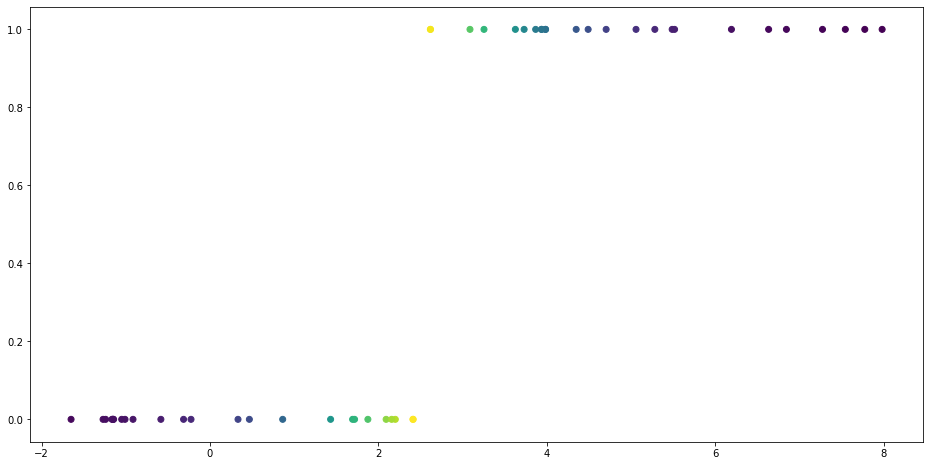

In [34]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x_cat, y_cat_pred, c=y_proba_max);

In [48]:
sig_fitted = sigmoid_extra(x_sig, log_reg.coef_[0], -log_reg.intercept_)

In [49]:
x_sig

array([-5.        , -4.93467337, -4.86934673, -4.8040201 , -4.73869347,
       -4.67336683, -4.6080402 , -4.54271357, -4.47738693, -4.4120603 ,
       -4.34673367, -4.28140704, -4.2160804 , -4.15075377, -4.08542714,
       -4.0201005 , -3.95477387, -3.88944724, -3.8241206 , -3.75879397,
       -3.69346734, -3.6281407 , -3.56281407, -3.49748744, -3.4321608 ,
       -3.36683417, -3.30150754, -3.2361809 , -3.17085427, -3.10552764,
       -3.04020101, -2.97487437, -2.90954774, -2.84422111, -2.77889447,
       -2.71356784, -2.64824121, -2.58291457, -2.51758794, -2.45226131,
       -2.38693467, -2.32160804, -2.25628141, -2.19095477, -2.12562814,
       -2.06030151, -1.99497487, -1.92964824, -1.86432161, -1.79899497,
       -1.73366834, -1.66834171, -1.60301508, -1.53768844, -1.47236181,
       -1.40703518, -1.34170854, -1.27638191, -1.21105528, -1.14572864,
       -1.08040201, -1.01507538, -0.94974874, -0.88442211, -0.81909548,
       -0.75376884, -0.68844221, -0.62311558, -0.55778894, -0.49

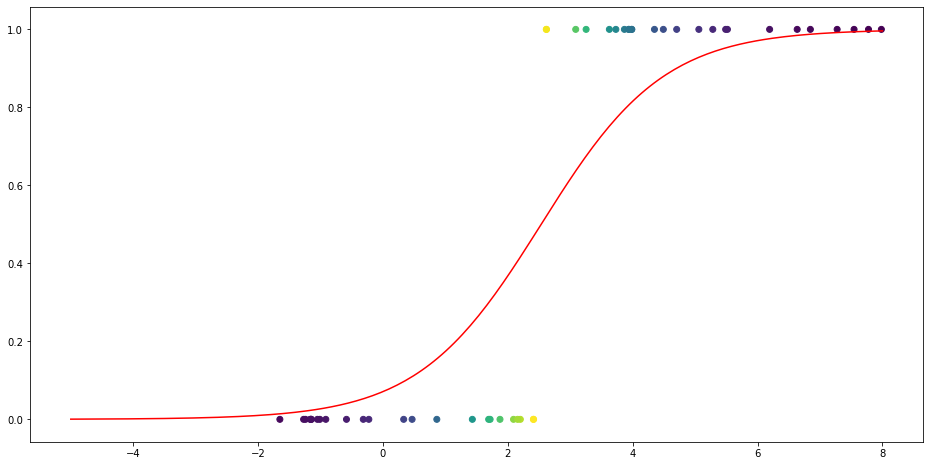

In [52]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(x_cat, y_cat_pred, c=y_proba_max)
ax.plot(x_sig, sig_fitted, c='r');

In [53]:
from sklearn.datasets import make_blobs

In [54]:
X, y = make_blobs(n_samples=300, n_features=2, centers=((1, 1), (5, 5)), cluster_std=1)

In [55]:
trm = np.array([[1, -2], [-2, 1]])

In [56]:
X = X @ trm

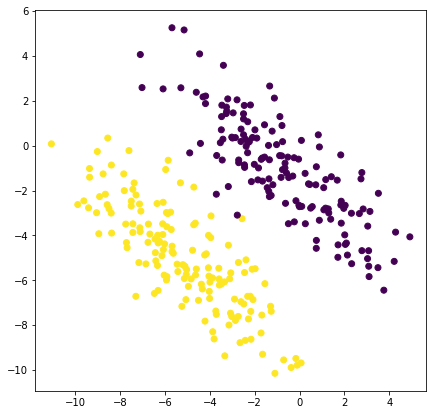

In [57]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0], X[:, 1], c=y)
ax.axis('equal');

In [58]:
log_reg2d = LogisticRegression(solver='liblinear')

In [59]:
log_reg2d.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_pred = log_reg2d.predict(X)

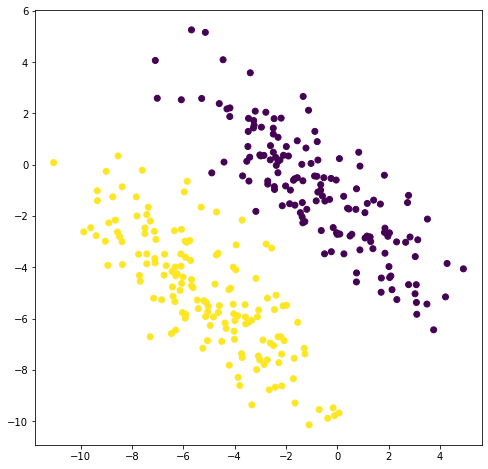

In [61]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y_pred)
ax.axis('equal');

In [62]:
y_prob = log_reg2d.predict_proba(X)[:, 1]

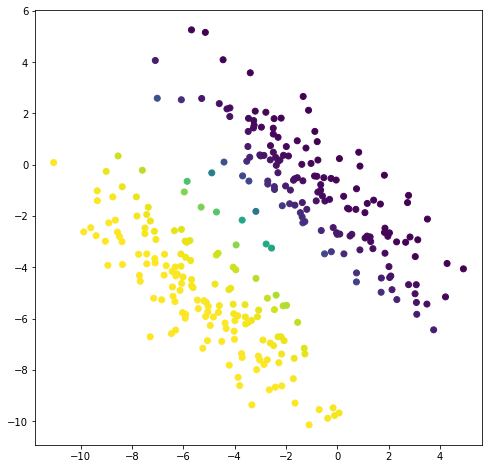

In [63]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y_prob)
ax.axis('equal');

In [64]:
from sklearn.svm import SVC

In [65]:
X, y = make_blobs(n_samples=300, n_features=2, centers=((1, 1), (5, 5)), cluster_std=0.6)
X = X @ trm

In [66]:
svm_blobs = SVC(kernel='linear')

In [67]:
svm_blobs.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [68]:
y_svm_pred = svm_blobs.predict(X)

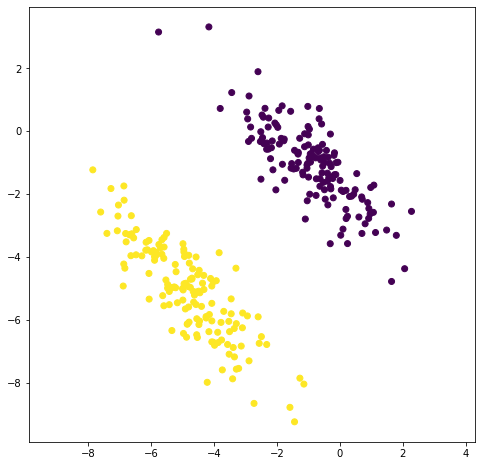

In [69]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y_svm_pred)
ax.axis('equal');

In [70]:
from sklearn.datasets import make_circles

In [71]:
X, y = make_circles(n_samples=500, noise=0.05, factor=0.6)

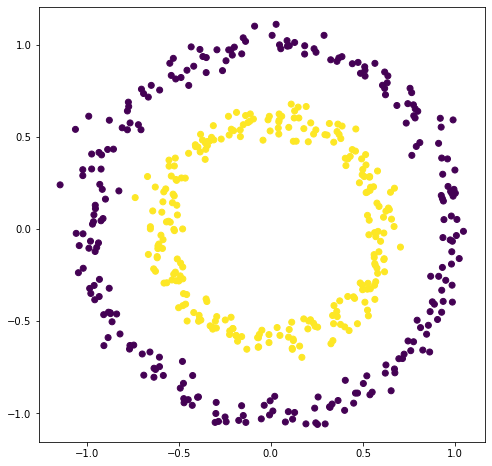

In [72]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y)
ax.axis('equal');

In [77]:
circle_df = pd.DataFrame(data=X, columns=['x1', 'x2'])
circle_df['squared'] = np.sqrt(circle_df['x1']**2 + circle_df['x2']**2)

In [78]:
circle_df.head()

,x1,x2,squared
0,0.126665,0.602893,0.616055
1,0.216528,0.576381,0.615711
2,0.511007,0.862437,1.002460
3,0.854965,-0.522434,1.001950
4,-0.205656,-0.540748,0.578535


In [79]:
svm_circle = SVC(kernel='linear')

In [80]:
svm_circle.fit(circle_df, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [81]:
y_linear_pred = svm_circle.predict(circle_df)

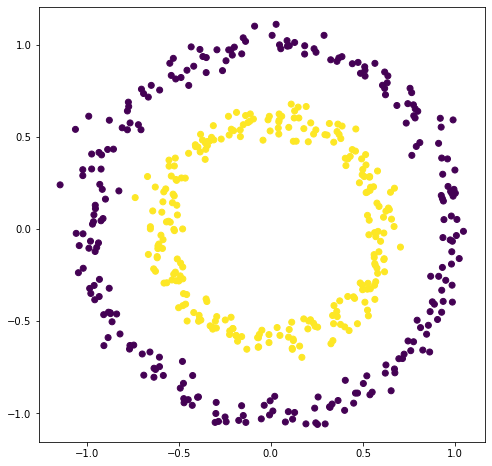

In [82]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y_linear_pred)
ax.axis('equal');

In [121]:
svm_rbf = SVC(gamma='scale')

In [122]:
svm_rbf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [123]:
y_rbf_pred = svm_rbf.predict(X)

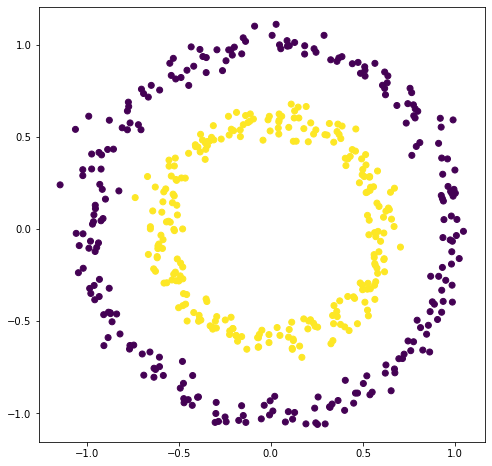

In [124]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X[:, 0], X[:, 1], c=y_rbf_pred)
ax.axis('equal');

In [125]:
from sklearn.datasets import make_moons

In [126]:
X_moons, y_moons = make_moons(n_samples=500, noise=0.2, random_state=27)

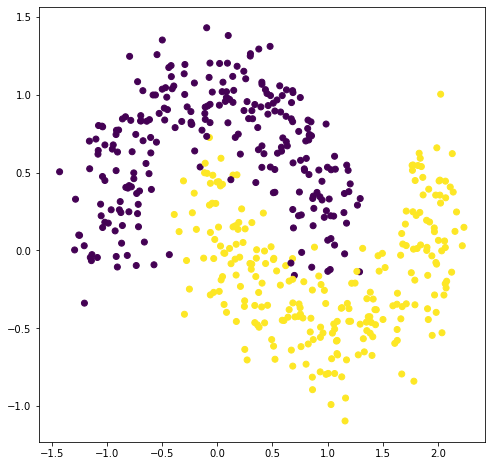

In [128]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons);

In [129]:
svm_moons_1 = SVC(C=1, gamma='scale')

In [130]:
svm_moons_1.fit(X_moons, y_moons)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [131]:
from mlxtend.plotting import plot_decision_regions

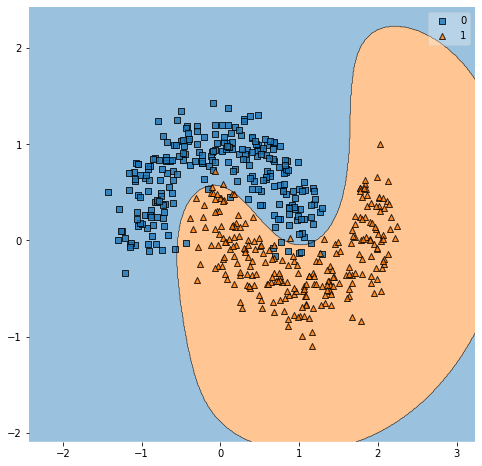

In [132]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_decision_regions(X_moons, y_moons, svm_moons_1);

In [133]:
svm_moons_100 = SVC(C=100, gamma=100)

In [134]:
svm_moons_100.fit(X_moons, y_moons)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

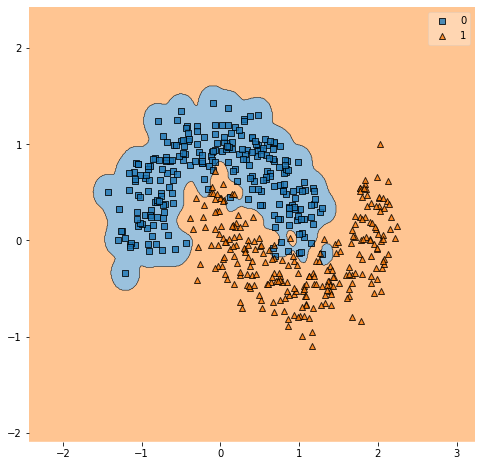

In [135]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_decision_regions(X_moons, y_moons, svm_moons_100);

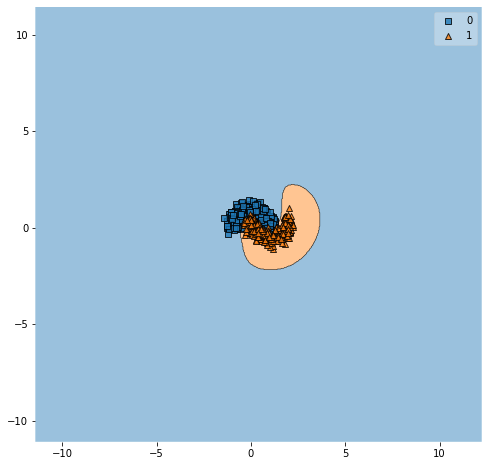

In [136]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_decision_regions(X_moons, y_moons, svm_moons_1, zoom_factor=0.1);

## Cross Validation

In [137]:
1 / (2 * X_moons.var())

0.8760502191553255

In [170]:
C_values = np.logspace(-1, 3, 5)
C_values

array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [171]:
gamma_values = np.logspace(-2, 2, 5)
gamma_values

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [172]:
kernel_values = ['linear', 'rbf']

In [173]:
from sklearn.model_selection import GridSearchCV

In [174]:
parameters = {'kernel': kernel_values, 'C': C_values, 'gamma': gamma_values}

In [186]:
agnostic_svc = SVC(random_state=12)

In [187]:
clf = GridSearchCV(estimator=agnostic_svc, param_grid=parameters, scoring='roc_auc', cv=4, n_jobs=-1)

In [188]:
clf.fit(X_moons, y_moons)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=12, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [189]:
clf.best_score_

0.9979590373783923

In [190]:
clf.best_params_

{'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}

In [193]:
X_moons_skewed = deepcopy(X_moons)
X_moons_skewed[:, 1] *= 1e-6

In [195]:
from sklearn.model_selection import train_test_split

In [211]:
X1, X2, y1, y2 = train_test_split(X_moons_skewed, y_moons)

In [212]:
svm_moons_1.fit(X1, y1)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [213]:
y_pred = svm_moons_1.predict(X2)

In [214]:
y2

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [215]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [216]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [217]:
accuracy_score(y2, y_pred)

0.608